# Spike Challenge - Predicción de caudales extremos en Chile 

In [1]:
import numpy as np # version 1.16.4
import pandas as pd# version 0.17.1
import matplotlib.pyplot as plt# version 2.2.0 
import seaborn as sns# version 0.9.0
from datetime import datetime
sns.set()

In [2]:
#Eliminacion de las columnas que no se usaran en el desafio

data_caudal_extra= pd.read_csv("caudal_extra.csv")

data_use=data_caudal_extra.drop(["Unnamed: 0","institucion","fuente","altura","nombre","latitud","longitud",
                                 "nombre_sub_cuenca","gauge_id","gauge_name","cantidad_observaciones"],axis=1)

In [3]:
# Cambiamos el tipo de datos de "fecha" de objeto a datatime y luego eliminamos hrs:min:seg

## primavera: 23 de septiembre ala 21 de dic(12)
## verano 21 de diciembte al 20 de marzo(3)
## otoño: del 20 de marzo al 21 de junio(6)
##invierno del 21 de junio al 23 de septiembre(9)
data_use["fecha"]=pd.to_datetime(data_use["fecha"],format="%Y-%m-%d")

## missing values
data_use.isnull().sum()
## null values in precip_promedio = 1.96 %
## null values in temp_max=10.74%
## Asumimos que el porcentaje maximo de null values es 12.7 %, por que debemos tomar una desicion de eliminarlos o transformarlos.
## Para simplificar el problema tomaremos la desicion de eliminar los null values en nuestro data set
## Para transformarlos, se debe tomar la temperatura/precipacion promedio de ese mes o semana, y transformar el valor null por la media calculada.

data_use.dropna(axis=0,inplace=True)









array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8a9f8a6d8>,
      dtype=object)

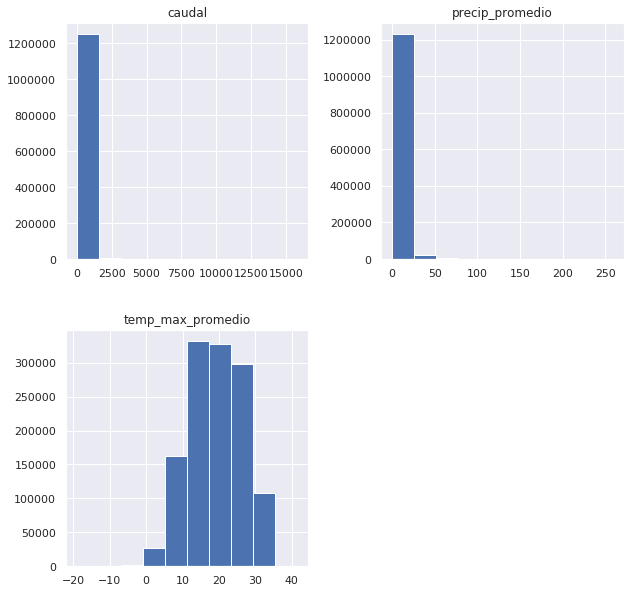

In [4]:
# Plotiar las  distribuciones de datos de caudal, precipitacion y temperatura del todo el data set

data_dist=data_use.drop(["codigo_estacion","codigo_cuenca","fecha"],axis=1)
data_dist.hist(figsize=(10,10))




## Pregunta 2

¿Que puedes decir de los datos,distribuciones,missing u otros?,¿Hay algo que te llame la atencion?, ¿Por que hya tantos valores misssin?

En relacion a las distribuciones de los datos de manera global. En temperatura la densidad esta concentrada entre los 10 y 30 grados. En caudal y precipitaciones poseen una distribucion similiar a simple vista, al ser distribuciones parecidad nos podrian indicar una posible relacion.

Los missing values, a simple vista estan concentrados en los primeros años de las mediciones, esto podria indicarnos que en las estaciones de mediciones se contaban con un aparato y no el otro, u que los medidores no funcionan de manera correcta

## Pregunta 3
Crear 2 funciones para hacer plots de los datos

In [5]:
def time_plot_una_estacion(codigo_estacion,columna,fecha_min,fecha_max):
    
    
    f_min=datetime.strptime(fecha_min,'%Y-%m-%d')
    f_max=datetime.strptime(fecha_max,'%Y-%m-%d')
    
    data_plot_use=data_use[(data_use["codigo_estacion"]==codigo_estacion) & (data_use["fecha"]>=f_min) &
                           (data_use["fecha"]<=f_max)]
    
    plt.plot(data_plot_use["fecha"],data_plot_use[columna])
    plt.xlabel("Tiempo")
    plt.ylabel(columna)
    
    
    
    

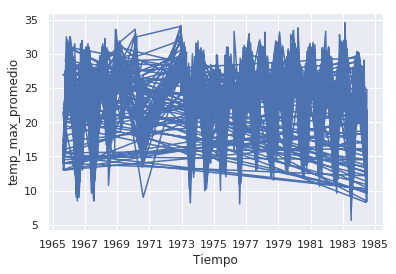

In [6]:
#data[(data['rnd_2'] == 2) & (data['rnd_3'] > 15)]

codigo=4540001
col="temp_max_promedio"
fmin="1965-08-19"
fmax="2000-12-21"

time_plot_una_estacion(codigo,col,fmin,fmax)


In [7]:
def time_plot_una_estacion_varias_columnas(codigo_estacion,columnas,fecha_min,fecha_max):
    
    
    f_min=datetime.strptime(fecha_min,'%Y-%m-%d')
    f_max=datetime.strptime(fecha_max,'%Y-%m-%d')
    
    data_plot_use=data_use[(data_use["codigo_estacion"]==codigo_estacion) & (data_use["fecha"]>=f_min) &
                           (data_use["fecha"]<=f_max)]
    for columna in columnas:
        
        plt.plot(data_plot_use["fecha"],data_plot_use[columna],label="ola")
        plt.xlabel("Tiempo")
        plt.ylabel("Medicion")
        plt.axis('equal')
        
       
    
    

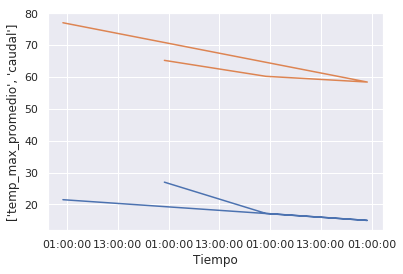

In [8]:
codigo=4540001
cols=["temp_max_promedio","caudal"]
fmin="1965-08-19"
fmax="1965-08-22"

time_plot_una_estacion(codigo,cols,fmin,fmax)

## Pregunta 7 : Predicción   de   caudal   extremo.

En los ultimos años en la literatura se han propuesta usar el modelo de "Extreme learning machine"(ELM) predecir problemas similares a los aluviones u otros fenomenos.

Se proponen como un esquema de aprendizaje general para distintos tipos de redes. Se caracteriza por su alta presicion, una baja intervencion humana y reducciendo el tiempo de computacion. La gran diferencia de otros modelos con ELM, es que en este ultimo la asignación de pesos tanto de entrada como de conexión entre capas ocultas aleatorios distribuidos en el intérvalo [-1,1].Estoreduce el tiempo de entrenamiento de la red a una regresion sobre los datos de salida, bajando el tiempo sin afectar gravemente al desempeño de la red.

Podriamos usar los datos de temperatura, precipitaciones y la localidad geografica. El problema de entrenar los modelos continuamente para poder mejorar la prediccion es el tiempo en tarde en entrenarse el modelo (ELM lo soluciona).Tomaria los datos historicos 
